In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from keras.regularizers import l2
from keras.regularizers import l1_l2
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('diabetes.csv')

Explore Data

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

Visualização de dados

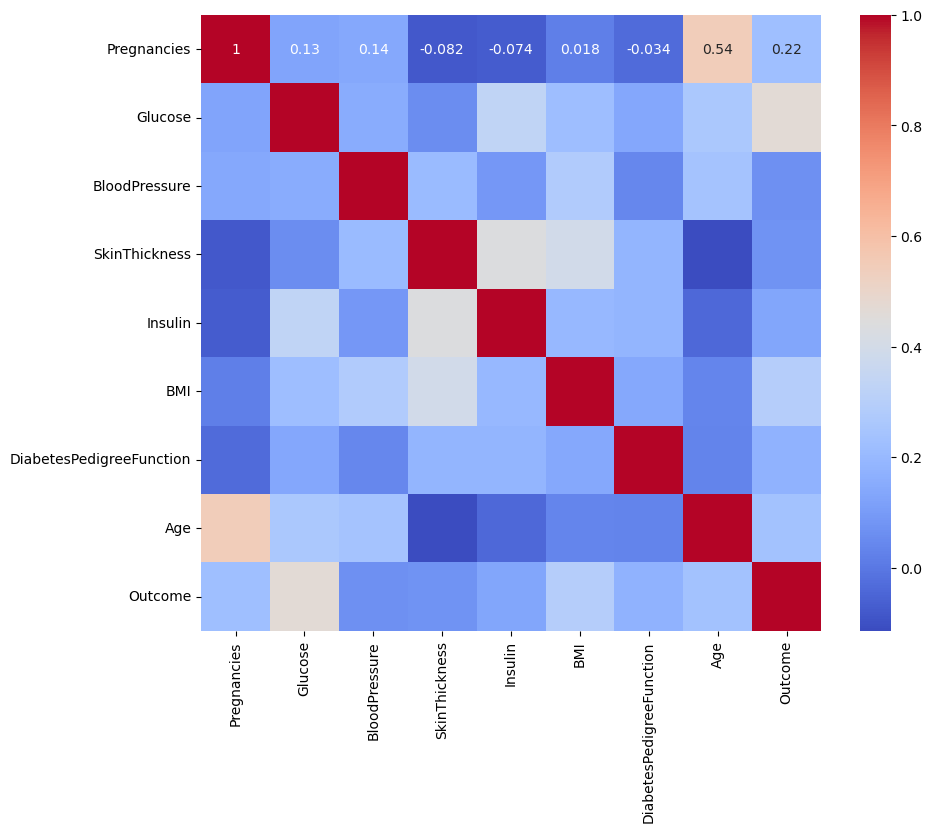

In [11]:
continuous_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

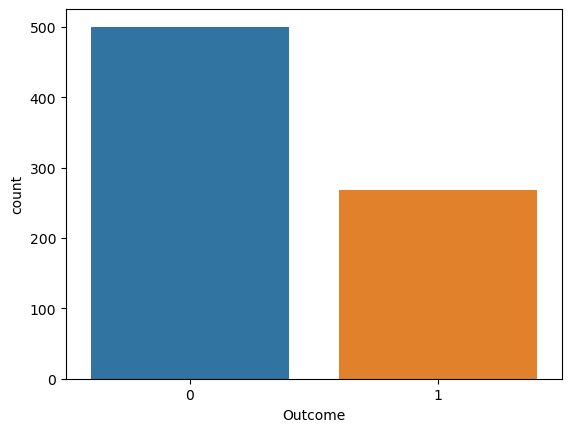

In [12]:
sns.countplot(x='Outcome',data=df)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_22168\498178910.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'] )
c:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distripution plot'}, xlabel='Pregnancies', ylabel='Density'>

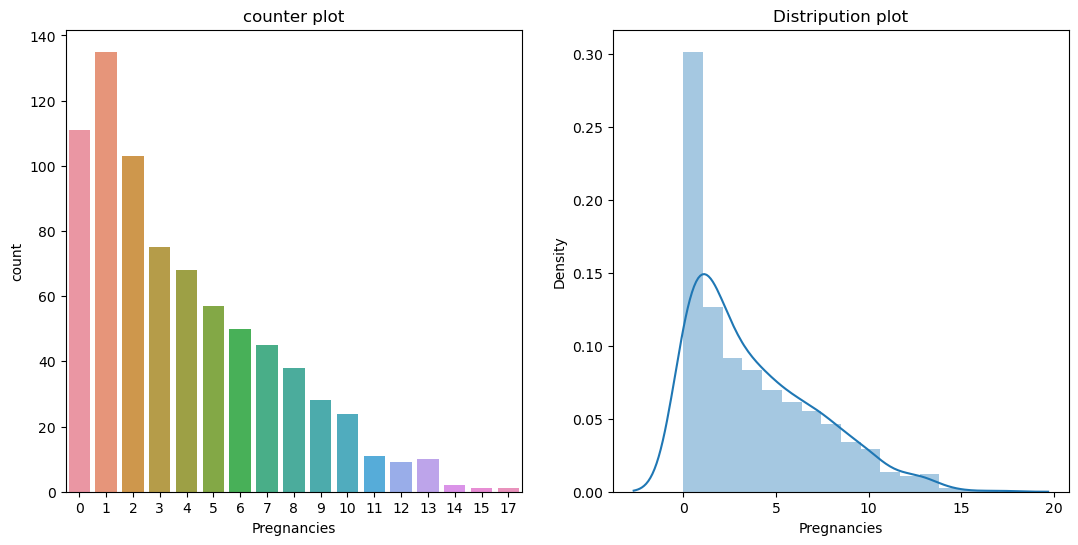

In [13]:
plt.figure(figsize =(20,6))
plt.subplot (1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data= df)

plt.subplot (1,3,2)
plt.title('Distripution plot')
sns.distplot(df['Pregnancies'] )


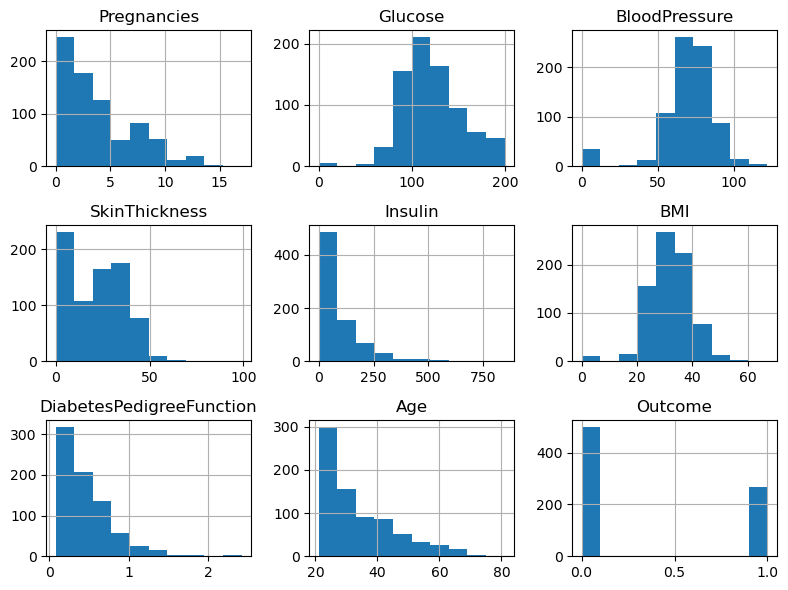

In [14]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

Criar o modelo

In [15]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] * df['Age']
df['BMI_Age'] = df['BMI'] * df['Age']

In [16]:
X=df.drop('Outcome', axis=1)
y= df['Outcome']

In [17]:
#important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

In [18]:
#X_important = X[important_features]

In [19]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

SMOTE

In [20]:
#ros = RandomOverSampler(random_state=42)
#X_ros,y_ros = ros.fit_resample(X,y)

smote = SMOTE(random_state=42)
X_ros,y_ros = smote.fit_resample(X,y)

<Axes: xlabel='Outcome', ylabel='count'>

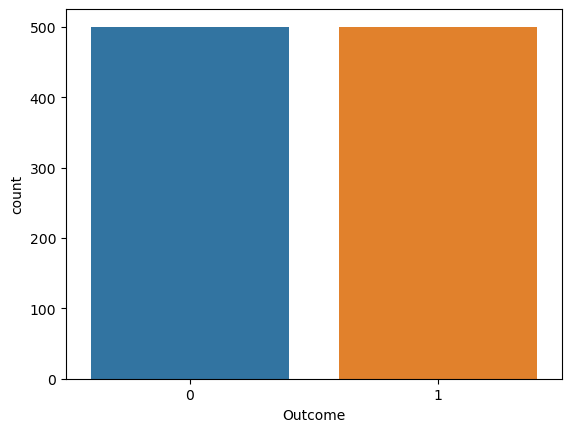

In [21]:
sns.countplot(data=df,x=y_ros)

In [22]:
X_trainOver, X_testOver, y_trainOver, y_testOver = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_trainOver = scaler.fit_transform(X_trainOver)
X_testOver = scaler.transform(X_testOver)

Modelo Extra Tree Classifier

In [24]:
modeloExtra = ExtraTreesClassifier(max_depth=6, min_samples_leaf=52,
                     min_samples_split=80,random_state=42)

In [25]:
modeloExtra.fit(X_trainOver,y_trainOver)

ExtraTreesClassifier(max_depth=6, min_samples_leaf=52, min_samples_split=80,
                     random_state=42)

In [26]:
tree = modeloExtra.estimators_[0]

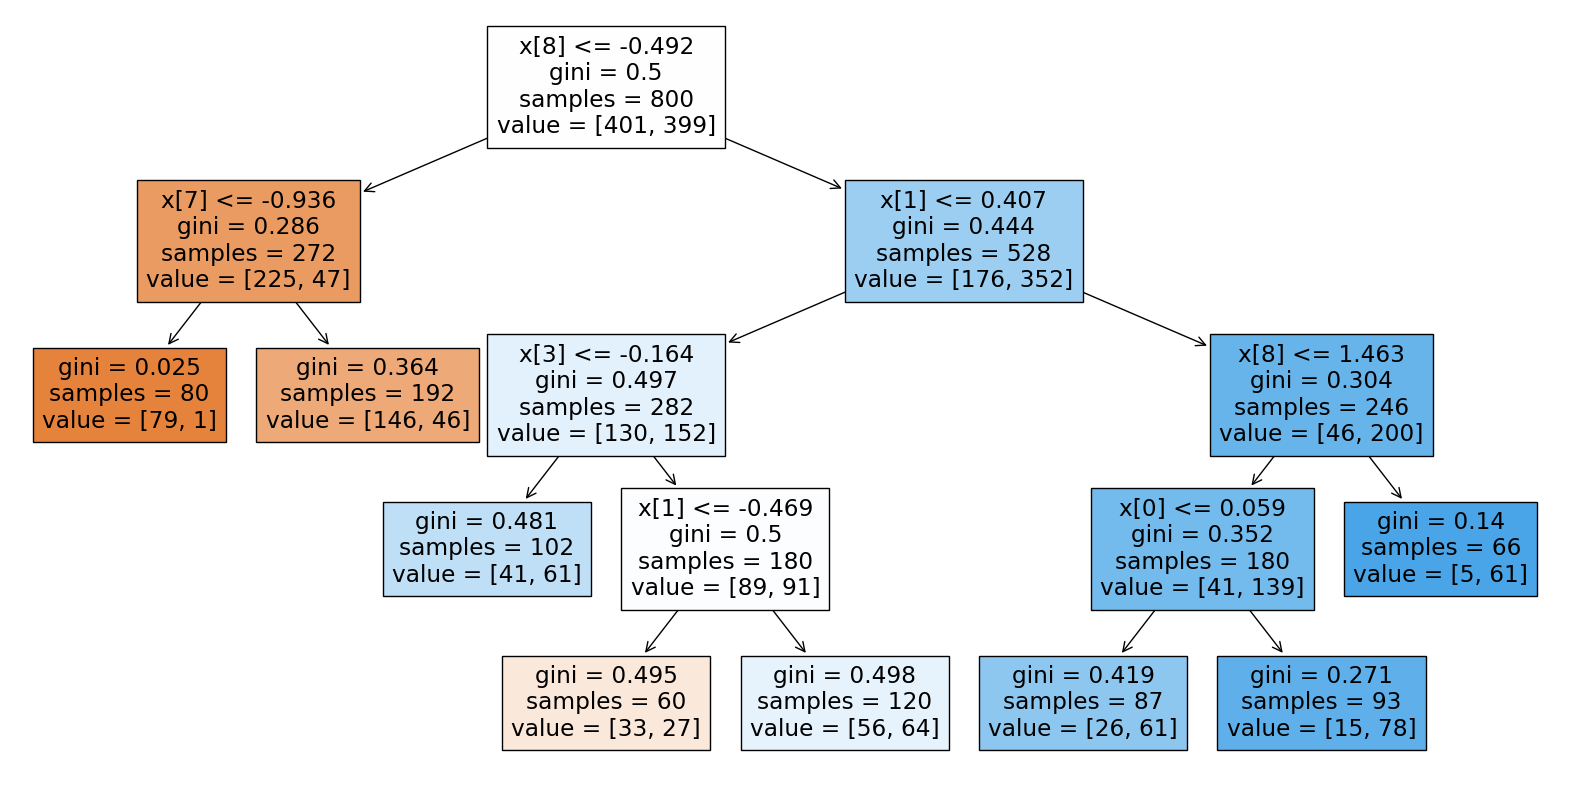

In [27]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True)
plt.show()

In [28]:
print("Importância das Features:")
print(modeloExtra.feature_importances_)

Importância das Features:
[0.07561037 0.20077465 0.00390518 0.02282762 0.03501302 0.07285953
 0.03435384 0.06193843 0.23760057 0.12263877 0.13247803]


In [29]:
modeloExtraOver = modeloExtra.predict(X_testOver)
modeloExtraOver

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [30]:
accuracyExtraOver = accuracy_score(y_testOver, modeloExtraOver)
recallExtraOver = recall_score(y_testOver, modeloExtraOver)
fExtraOver = f1_score(y_testOver, modeloExtraOver)

In [31]:
print("Acuracia:", accuracyExtraOver)
print("Recall:", recallExtraOver)
print("F1 Score:", fExtraOver)

Acuracia: 0.77
Recall: 0.8118811881188119
F1 Score: 0.780952380952381


In [32]:
matrizExtraOver = confusion_matrix(y_testOver, modeloExtraOver)
matrizExtraOver

array([[72, 27],
       [19, 82]], dtype=int64)

In [33]:
parametros = {'min_samples_split': [34,36,38,40],
                     'min_samples_leaf': [32,34,36,38,40],
                     'max_depth':[4,6,8,10,12]
}

In [34]:
#guardando na variável a busca pelos melhores hiperaparametros de acordo com o modelo e os hiperparametro já passados na variável parametros
modeloExtra2 = GridSearchCV(ExtraTreesClassifier(),
                                parametros,
                                scoring= 'accuracy',
                                n_jobs = -1)

In [35]:
#treinando o modelo e procurando os melhore hiperparametros
modeloExtra2.fit(X_trainOver, y_trainOver)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [32, 34, 36, 38, 40],
                         'min_samples_split': [34, 36, 38, 40]},
             scoring='accuracy')

In [36]:
#guardando o melhor modelo em uma variável
melhorModelo = modeloExtra2.best_estimator_

In [37]:
#verificando os melhores hiperparametros do modelo
print (melhorModelo)

ExtraTreesClassifier(max_depth=6, min_samples_leaf=34, min_samples_split=38)


In [38]:
train_sizes, train_scores, val_scores = learning_curve(
    modeloExtra, X_trainOver, y_trainOver, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [39]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

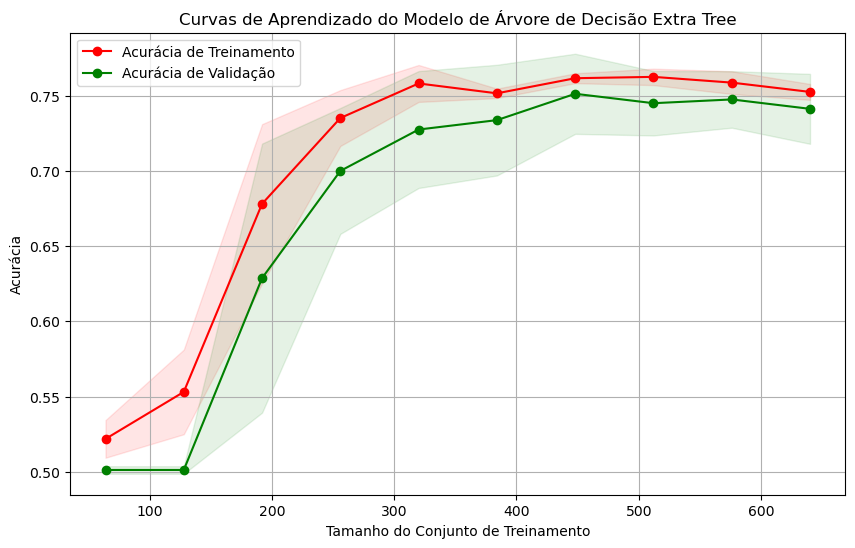

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Acurácia de Treinamento')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Acurácia de Validação')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

plt.title('Curvas de Aprendizado do Modelo de Árvore de Decisão Extra Tree')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

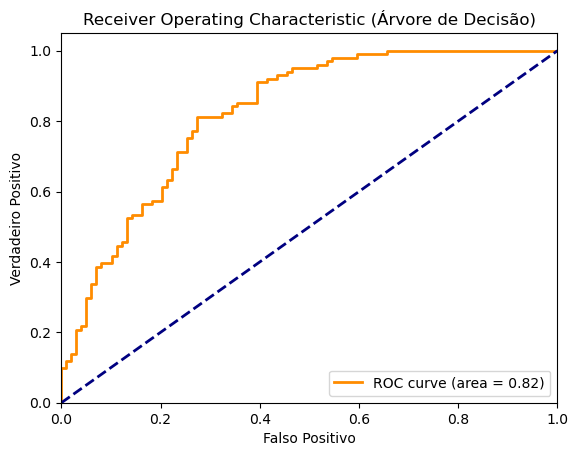

In [41]:
y_pred_proba = modeloExtra.predict_proba(X_testOver)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_testOver, y_pred_proba)

# Calcule a AUC
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic (Árvore de Decisão)')
plt.legend(loc="lower right")
plt.show()

In [42]:
scores = cross_val_score(modeloExtra, X_ros, y_ros, cv=5, scoring='accuracy')

print(f"Acurácia média com validação cruzada: {scores.mean():.2f}")
print(f"Desvio padrão da acurácia com validação cruzada: {scores.std():.2f}")

Acurácia média com validação cruzada: 0.75
Desvio padrão da acurácia com validação cruzada: 0.03
